<a href="https://colab.research.google.com/github/MIKBRUNO/TPNS/blob/main/lab2/lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://education.yandex.ru/handbook/ml/article/pervoe-znakomstvo-s-polnosvyaznymi-nejrosetyami
# https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii
# https://archive.ics.uci.edu/dataset/73/mushroom

In [ ]:
import pandas as pd

In [ ]:
from math import log2
def entropy(feature: pd.Series) -> float:
  classes = feature.value_counts()
  count = len(feature)
  probability = [class_count / count for class_count in classes if not (class_count / count) < 0.001]

  return sum([-p * log2(p) for p in probability])

In [ ]:
def information_gain(data: pd.DataFrame, target: str, feature: str) -> float:
  gain = entropy(data[target])
  for unique in data[feature].unique():
    subset = data[data[feature] == unique][target]
    gain -= entropy(subset) * (len(subset)/len(data[target]))
  return gain

In [ ]:
from math import log2
def gain_ratio(data: pd.DataFrame, target: str, feature: str) -> float:
  intr_info = 0
  for unique in data[feature].unique():
    subset = data[data[feature] == unique][target]
    weight = len(subset) / len(data[target])
    intr_info -= weight * log2(weight)
  return information_gain(data, target, feature) / intr_info

# Mushrooms

## Dataset

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd

In [ ]:
from ucimlrepo import fetch_ucirepo

mushroom = fetch_ucirepo(id=73)

features = mushroom.data.features
target = mushroom.data.targets

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [ ]:
target.describe()

,poisonous
count,8124
unique,2
top,e
freq,4208


In [ ]:
features.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
features['veil-type'].describe()

count     8124
unique       1
top          p
freq      8124
Name: veil-type, dtype: object

In [ ]:
features.drop('veil-type', axis=1, inplace=True)

<ipython-input-85-1f4c3daf09d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop('veil-type', axis=1, inplace=True)


In [ ]:
features.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [ ]:
'''
bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,
missing=?
'''
features['stalk-root'].unique()

array(['e', 'c', 'b', 'r', nan], dtype=object)

In [ ]:
features['stalk-root'].fillna('m', inplace=True)

<ipython-input-88-77a75fc9a85a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['stalk-root'].fillna('m', inplace=True)


In [ ]:
full_df = features.copy()
full_df['poisonous'] = target['poisonous']

In [ ]:
mushrooms_gain_ratio = pd.DataFrame(index=full_df.columns.drop('poisonous'))
mushrooms_gain_ratio['gain_ratio'] = mushrooms_gain_ratio.index.map(lambda col: gain_ratio(full_df, 'poisonous', col))

In [ ]:
mushrooms_gain_ratio.abs().style.background_gradient(cmap='coolwarm')

,gain_ratio
cap-shape,0.029522
cap-surface,0.018147
cap-color,0.014361
bruises,0.196440
odor,0.390648
gill-attachment,0.081818
gill-spacing,0.158154
gill-size,0.257946
gill-color,0.137597
stalk-shape,0.007616


In [ ]:
gain_ratio_threshold = 0.2

In [ ]:
good_cols = [col for col in features.columns if mushrooms_gain_ratio['gain_ratio'].loc[col] > gain_ratio_threshold]
good_cols

['odor',
 'gill-size',
 'stalk-surface-above-ring',
 'ring-type',
 'spore-print-color']

In [ ]:
features = features.drop(columns=[col for col in features.columns if col not in good_cols])
features.columns

Index(['odor', 'gill-size', 'stalk-surface-above-ring', 'ring-type',
       'spore-print-color'],
      dtype='object')

In [ ]:
binary_columns = [col for col in features.columns if features[col].nunique() == 2]
binary_columns

['gill-size']

In [ ]:
if 'ring-number' in features.columns:
  features['ring-number'] = features['ring-number'].map({"n": 0, "o": 1, "t": 2})

In [ ]:
features = pd.get_dummies(features, columns=[col for col in features.columns if col not in binary_columns + ['ring-number']], drop_first=False)

In [ ]:
features = pd.get_dummies(features, columns=binary_columns, drop_first=True)

In [ ]:
target = pd.get_dummies(target, columns=['poisonous'], drop_first=True)

In [ ]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   poisonous_p  8124 non-null   bool 
dtypes: bool(1)
memory usage: 8.1 KB


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   odor_a                      8124 non-null   bool 
 1   odor_c                      8124 non-null   bool 
 2   odor_f                      8124 non-null   bool 
 3   odor_l                      8124 non-null   bool 
 4   odor_m                      8124 non-null   bool 
 5   odor_n                      8124 non-null   bool 
 6   odor_p                      8124 non-null   bool 
 7   odor_s                      8124 non-null   bool 
 8   odor_y                      8124 non-null   bool 
 9   stalk-surface-above-ring_f  8124 non-null   bool 
 10  stalk-surface-above-ring_k  8124 non-null   bool 
 11  stalk-surface-above-ring_s  8124 non-null   bool 
 12  stalk-surface-above-ring_y  8124 non-null   bool 
 13  ring-type_e                 8124 non-null   bool 
 14  ring-typ

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

## Keras

In [ ]:
# https://keras.io/api/layers/core_layers/dense/
# https://keras.io/api/models/model_training_apis/

In [ ]:
from tensorflow import keras

classifier_input = keras.Input(shape=X_train.shape[1])
x = keras.layers.Dense(
    units=16,
    activation='relu',
    use_bias=True,
    bias_initializer="zeros",
)(classifier_input)
x = keras.layers.Dense(
    units=8,
    activation='relu',
    use_bias=True,
    bias_initializer="zeros",
)(x)
classifier_output = keras.layers.Dense(
    units=1,
    activation='sigmoid',
    use_bias=True,
    bias_initializer="zeros",
)(x)
classifier = keras.Model(inputs=classifier_input, outputs=classifier_output)

In [ ]:
classifier.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_7 (Dense)             (None, 16)                464       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


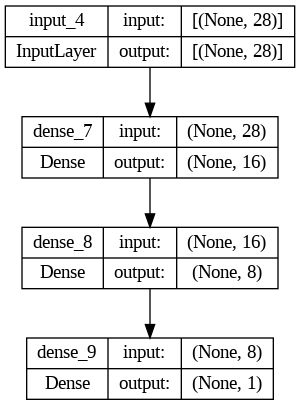

In [ ]:
keras.utils.plot_model(classifier, show_shapes=True)

In [ ]:
classifier.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    # loss=keras.losses.BinaryCrossentropy(),
    loss=keras.losses.MSE,
    metrics=[
        keras.metrics.BinaryAccuracy(),
        keras.metrics.Recall(),
        keras.metrics.Precision(),
        keras.metrics.AUC()
    ],
)

In [ ]:
classifier.evaluate(
    x=X_test.astype('int').values,
    y=y_test.astype('int').values,
    batch_size=None,
    verbose=1,
)

51/51 [==============================] - 0s 2ms/step - loss: 8.7945e-07 - binary_accuracy: 1.0000 - recall_1: 1.0000 - precision_1: 1.0000 - auc_1: 1.0000


[8.794453378868639e-07, 1.0, 1.0, 1.0, 1.0]

In [ ]:
history = classifier.fit(
    x=X_train.astype('int').values,
    y=y_train.astype('int').values,
    batch_size=None,
    epochs=10,
    shuffle=True,
    steps_per_epoch=None,
)

Epoch 1/10
204/204 [==============================] - 3s 4ms/step - loss: 0.0176 - binary_accuracy: 0.9786 - recall_1: 0.9590 - precision_1: 0.9967 - auc_1: 0.9993
Epoch 2/10
204/204 [==============================] - 1s 4ms/step - loss: 3.9084e-04 - binary_accuracy: 0.9997 - recall_1: 0.9994 - precision_1: 1.0000 - auc_1: 1.0000
Epoch 3/10
204/204 [==============================] - 1s 7ms/step - loss: 2.8704e-05 - binary_accuracy: 1.0000 - recall_1: 1.0000 - precision_1: 1.0000 - auc_1: 1.0000
Epoch 4/10
204/204 [==============================] - 1s 7ms/step - loss: 1.1512e-05 - binary_accuracy: 1.0000 - recall_1: 1.0000 - precision_1: 1.0000 - auc_1: 1.0000
Epoch 5/10
204/204 [==============================] - 1s 7ms/step - loss: 6.6081e-06 - binary_accuracy: 1.0000 - recall_1: 1.0000 - precision_1: 1.0000 - auc_1: 1.0000
Epoch 6/10
204/204 [==============================] - 1s 7ms/step - loss: 4.5916e-06 - binary_accuracy: 1.0000 - recall_1: 1.0000 - precision_1: 1.0000 - auc_1: 1.0

In [ ]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'recall_1', 'precision_1', 'auc_1'])

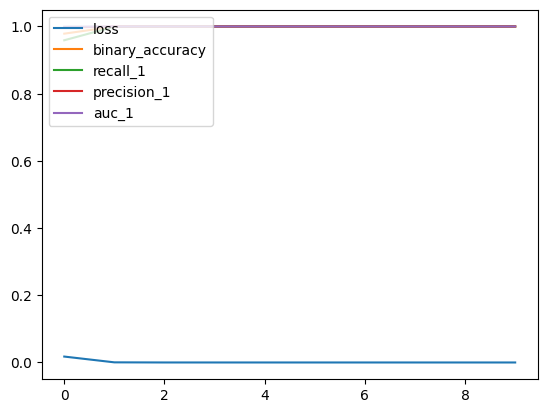

In [ ]:
import matplotlib.pyplot as plt

for k in history.history.keys():
  plt.plot(history.history[k])
plt.legend(history.history.keys(), loc='upper left')

In [ ]:
testx = X_test.iloc[1].astype('int').values.reshape((1, X_test.shape[1]))
y_test.iloc[1]

poisonous_p    False
Name: 3641, dtype: bool

In [ ]:
classifier.predict(testx)

1/1 [==============================] - 0s 173ms/step


array([[5.3459485e-07]], dtype=float32)

# Laptops

## Dataset

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d mrsimple07/laptoppriceprediction

Dataset URL: https://www.kaggle.com/datasets/mrsimple07/laptoppriceprediction
License(s): Apache 2.0
  0% 0.00/39.1k [00:00<?, ?B/s]
100% 39.1k/39.1k [00:00<00:00, 48.3MB/s]


In [ ]:
!unzip laptoppriceprediction.zip

Archive:  laptoppriceprediction.zip
  inflating: Laptop_price.csv        


In [ ]:
import pandas as pd

df = pd.read_csv("Laptop_price.csv")
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [ ]:
price_min = df['Price'].min()
price_max = df['Price'].max()
def unnorm_price(price):
  return price * (price_max - price_min) + price_min

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
discdf=df.copy()

In [ ]:
discdf["Price"] = pd.qcut(discdf['Price'], q=5, labels=range(5))
# discdf["Price"] = pd.cut(discdf['Price'], bins=[0, 15000, 25000, 100000], labels=['cheap', 'medium', 'expensive'])

In [ ]:
categorical = ['RAM_Size', 'Storage_Capacity', 'Brand']

In [ ]:
for cat in categorical:
  discdf[cat] = discdf[cat].astype('category')

In [ ]:
for col in df.columns:
  if col not in categorical + ['Price']:
    discdf[col] = pd.qcut(df[col], q=5, labels=range(5))

In [ ]:
laptops_gain_ratio = pd.DataFrame(index=discdf.columns.drop('Price'))
laptops_gain_ratio['gain_ratio'] = laptops_gain_ratio.index.map(lambda col: gain_ratio(discdf, 'Price', col))

In [ ]:
laptops_gain_ratio.abs().style.background_gradient(cmap='coolwarm')

,gain_ratio
Brand,0.006558
Processor_Speed,0.008412
RAM_Size,0.145987
Storage_Capacity,0.790761
Screen_Size,0.005757
Weight,0.003082


In [ ]:
good_cols = [col for col in laptops_gain_ratio.index if laptops_gain_ratio['gain_ratio'].loc[col] > 0.1]
good_cols

['RAM_Size', 'Storage_Capacity']

In [ ]:
df = df.drop(columns=[col for col in df.columns if col not in good_cols + ['Price']])
df.columns

Index(['RAM_Size', 'Storage_Capacity', 'Price'], dtype='object')

In [ ]:
for col in [c for c in df.columns if c not in ["Brand"]]:
    df[col] = ((df[col] - df[col].min()) / (df[col].max() - df[col].min()))

In [ ]:
if 'Brand' in df.columns:
  df = pd.get_dummies(df, columns=["Brand"], drop_first=False)
  df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RAM_Size          1000 non-null   float64
 1   Storage_Capacity  1000 non-null   float64
 2   Price             1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [ ]:
df.head()

,RAM_Size,Storage_Capacity,Price
0,0.428571,0.344086,0.353939
1,0.000000,1.000000,0.923946
2,0.000000,0.000000,0.028917
3,0.428571,0.344086,0.355609
4,1.000000,1.000000,0.976500


In [ ]:
df.describe()

,RAM_Size,Storage_Capacity,Price
count,1000.000000,1000.000000,1000.000000
mean,0.410714,0.441634,0.442537
std,0.392452,0.421288,0.377240
min,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.061924
50%,0.428571,0.344086,0.349613
75%,1.000000,1.000000,0.922286
max,1.000000,1.000000,1.000000


In [ ]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Keras

In [ ]:
from tensorflow import keras

regressor_input = keras.Input(shape=X_train.shape[1])
# x = keras.layers.Dense(
#     units=1,
#     activation='relu',
#     use_bias=True,
#     bias_initializer="zeros",
# )(regressor_input)
# x = keras.layers.Dense(
#     units=20,
#     activation='relu',
#     use_bias=True,
#     bias_initializer="zeros",
# )(x)
# regressor_output = keras.layers.Dense(
#     units=1,
#     activation='linear',
#     use_bias=True,
#     bias_initializer="zeros",
# )(x)
regressor_output = keras.layers.Dense(
    units=1,
    activation='linear',
    use_bias=True,
    bias_initializer="zeros",
)(regressor_input)
regressor = keras.Model(inputs=regressor_input, outputs=regressor_output)

In [ ]:
regressor.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


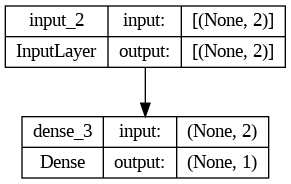

In [ ]:
keras.utils.plot_model(regressor, show_shapes=True)

In [ ]:
regressor.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss=keras.metrics.MSE,
    metrics=[
        keras.metrics.MAE,
        keras.metrics.MSE,
    ],
)

In [ ]:
regressor.evaluate(
    x=X_test.astype('float32').values,
    y=y_test.astype('float32').values,
    batch_size=None,
    verbose=1,
)

7/7 [==============================] - 0s 3ms/step - loss: 1.6809 - mean_absolute_error: 1.1031 - mean_squared_error: 1.6809


[1.6809296607971191, 1.1030728816986084, 1.6809296607971191]

In [ ]:
history = regressor.fit(
    x=X_train.astype('float32').values,
    y=y_train.astype('float32').values,
    batch_size=None,
    epochs=10,
    shuffle=True,
    steps_per_epoch=None,
)

Epoch 1/10
25/25 [==============================] - 0s 3ms/step - loss: 1.2916 - mean_absolute_error: 0.9176 - mean_squared_error: 1.2916
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5678 - mean_absolute_error: 0.5899 - mean_squared_error: 0.5678
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2485 - mean_absolute_error: 0.4097 - mean_squared_error: 0.2485
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1476 - mean_absolute_error: 0.3227 - mean_squared_error: 0.1476
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1162 - mean_absolute_error: 0.2840 - mean_squared_error: 0.1162
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0972 - mean_absolute_error: 0.2590 - mean_squared_error: 0.0972
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0813 - mean_absolute_error: 0.2361 - mean_squared_error: 0.0813
Epoch 8/10
25/25 [================

In [ ]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error'])

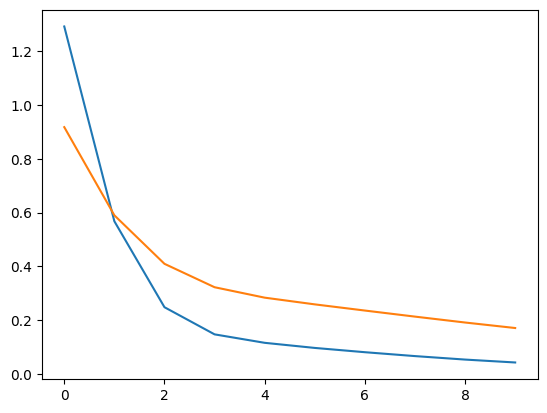

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
# plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['mean_absolute_error'])
# plt.plot(history.history['mean_squared_error'])

In [ ]:
X_test.iloc[0]

RAM_Size            0.0
Storage_Capacity    1.0
Name: 993, dtype: float64

In [ ]:
unnorm_price(y_test.iloc[0])

31571.913188565733

In [ ]:
unnorm_price(regressor.predict(X_test.iloc[0].values.reshape((1, X_test.shape[1]))))

1/1 [==============================] - 0s 175ms/step


array([[31158.281]], dtype=float32)